In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("binary_classification_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Payment_Method,Contract_Type,Has_AutoPay,Num_Complaints,...,Data_Overage_Fees,Has_Streaming_Service,Num_Devices_Connected,Region,Income_Level,Marital_Status,Has_Referral,Last_Upgrade_Months_Ago,Avg_Session_Duration_Minutes,Churn
0,CUST1000,56,Female,16,102.64,119.38,Crypto,Yearly,Yes,0,...,49.06,No,7,South,Low,Divorced,Yes,47,60.57,No
1,CUST1001,69,Female,13,196.41,337.59,Debit Card,Yearly,Yes,7,...,12.83,Yes,5,West,High,Divorced,Yes,52,101.40,Yes
2,CUST1002,46,Male,30,108.67,14.76,PayPal,Yearly,No,3,...,32.71,Yes,1,North,Medium,Married,Yes,34,46.56,Yes
3,CUST1003,32,Female,19,79.18,56.53,Crypto,Monthly,No,2,...,9.90,No,8,East,High,Divorced,Yes,21,103.88,Yes
4,CUST1004,60,Male,17,134.01,400.96,Crypto,Yearly,No,6,...,28.27,Yes,4,North,High,Single,No,37,51.78,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    300 non-null    object 
 1   Age                           300 non-null    int64  
 2   Gender                        300 non-null    object 
 3   Subscription_Length_Months    300 non-null    int64  
 4   Monthly_Bill                  300 non-null    float64
 5   Total_Usage_GB                300 non-null    float64
 6   Payment_Method                300 non-null    object 
 7   Contract_Type                 300 non-null    object 
 8   Has_AutoPay                   300 non-null    object 
 9   Num_Complaints                300 non-null    int64  
 10  Support_Calls_Made            300 non-null    int64  
 11  Data_Overage_Fees             300 non-null    float64
 12  Has_Streaming_Service         300 non-null    object 
 13  Num_D

In [5]:
df.tail()

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Payment_Method,Contract_Type,Has_AutoPay,Num_Complaints,...,Data_Overage_Fees,Has_Streaming_Service,Num_Devices_Connected,Region,Income_Level,Marital_Status,Has_Referral,Last_Upgrade_Months_Ago,Avg_Session_Duration_Minutes,Churn
295,CUST1295,19,Male,10,48.11,272.29,Credit Card,Monthly,No,5,...,30.40,Yes,9,West,High,Divorced,No,17,53.21,Yes
296,CUST1296,70,Male,17,148.88,391.02,PayPal,Monthly,No,5,...,15.47,No,2,East,Medium,Single,Yes,12,24.34,No
297,CUST1297,61,Male,10,138.61,57.96,Crypto,Monthly,No,8,...,41.19,No,2,South,Low,Divorced,No,15,106.12,Yes
298,CUST1298,43,Female,17,24.88,381.71,PayPal,Monthly,Yes,5,...,47.75,Yes,7,West,Medium,Single,Yes,8,69.06,Yes
299,CUST1299,49,Female,20,59.95,272.93,Crypto,Monthly,Yes,1,...,41.06,No,4,South,Low,Divorced,No,11,31.61,No


In [6]:
df.nunique()

CustomerID                      300
Age                              61
Gender                            2
Subscription_Length_Months       35
Monthly_Bill                    298
Total_Usage_GB                  300
Payment_Method                    4
Contract_Type                     2
Has_AutoPay                       2
Num_Complaints                   10
Support_Calls_Made               15
Data_Overage_Fees               290
Has_Streaming_Service             2
Num_Devices_Connected             9
Region                            4
Income_Level                      3
Marital_Status                    3
Has_Referral                      2
Last_Upgrade_Months_Ago          59
Avg_Session_Duration_Minutes    298
Churn                             2
dtype: int64

In [7]:
df.drop("CustomerID",inplace=True,axis=1)

In [8]:
for col in df:
    df.rename(columns={col:col.lower()},inplace=True)

In [9]:
df.columns

Index(['age', 'gender', 'subscription_length_months', 'monthly_bill',
       'total_usage_gb', 'payment_method', 'contract_type', 'has_autopay',
       'num_complaints', 'support_calls_made', 'data_overage_fees',
       'has_streaming_service', 'num_devices_connected', 'region',
       'income_level', 'marital_status', 'has_referral',
       'last_upgrade_months_ago', 'avg_session_duration_minutes', 'churn'],
      dtype='object')

In [10]:
for col in df.columns:
    if df[col].nunique()<20:
        print(col,":",df[col].unique())
        #print(df[col].value_counts())
        print("--------------------")

gender : ['Female' 'Male']
--------------------
payment_method : ['Crypto' 'Debit Card' 'PayPal' 'Credit Card']
--------------------
contract_type : ['Yearly' 'Monthly']
--------------------
has_autopay : ['Yes' 'No']
--------------------
num_complaints : [0 7 3 2 6 5 4 8 1 9]
--------------------
support_calls_made : [ 1 12  4 14  3 10  2  6  7 11  5  0 13  8  9]
--------------------
has_streaming_service : ['No' 'Yes']
--------------------
num_devices_connected : [7 5 1 8 4 9 6 3 2]
--------------------
region : ['South' 'West' 'North' 'East']
--------------------
income_level : ['Low' 'High' 'Medium']
--------------------
marital_status : ['Divorced' 'Married' 'Single']
--------------------
has_referral : ['Yes' 'No']
--------------------
churn : ['No' 'Yes']
--------------------


ENCODING THE CATEGORICAL VALUE

In [11]:
df1=df.copy()

In [13]:
#encoding Yes-1 and No-0
#is subset checks if col contains that value
for col in df1.columns:
    if df1[col].nunique()==2:
            if set(df1[col].unique()).issubset({"Yes", "No"}):
                df1[col]=df1[col].map({"Yes":1,"No":0})

In [14]:
df1["gender"]=df1["gender"].map({"Female":1,"Male":0})

In [15]:
#contract_type : Yearly-1' 'Monthly-0'
df1["contract_type"]=df1["contract_type"].map({"Yearly":1,"Monthly":0})

In [16]:
#payment_method : ['Crypto' 'Debit Card' 'PayPal' 'Credit Card']
df1["payment_method"]=df1["payment_method"].map({'Crypto':0, 'Debit Card':1, 'PayPal':2, 'Credit Card':3})

In [17]:
#region : ['South' 'West' 'North' 'East']
df1["region"]=df1["region"].map({'South':0, 'West':1 ,'North':2 ,'East':3})

In [18]:
#income_level : ['Low' 'High' 'Medium']
df1['income_level']=df1['income_level'].map({'Low':0, 'High':1, 'Medium':2})

In [19]:
#marital_status : ['Divorced' 'Married' 'Single']
df1['marital_status']=df1['marital_status'].map({'Divorced':0, 'Married':1, 'Single':2})

In [20]:
df1.head()

,age,gender,subscription_length_months,monthly_bill,total_usage_gb,payment_method,contract_type,has_autopay,num_complaints,support_calls_made,data_overage_fees,has_streaming_service,num_devices_connected,region,income_level,marital_status,has_referral,last_upgrade_months_ago,avg_session_duration_minutes,churn
0,56,1,16,102.64,119.38,0,1,1,0,1,49.06,0,7,0,0,0,1,47,60.57,0
1,69,1,13,196.41,337.59,1,1,1,7,12,12.83,1,5,1,1,0,1,52,101.40,1
2,46,0,30,108.67,14.76,2,1,0,3,4,32.71,1,1,2,2,1,1,34,46.56,1
3,32,1,19,79.18,56.53,0,0,0,2,14,9.90,0,8,3,1,0,1,21,103.88,1
4,60,0,17,134.01,400.96,0,1,0,6,3,28.27,1,4,2,1,2,0,37,51.78,1


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           300 non-null    int64  
 1   gender                        300 non-null    int64  
 2   subscription_length_months    300 non-null    int64  
 3   monthly_bill                  300 non-null    float64
 4   total_usage_gb                300 non-null    float64
 5   payment_method                300 non-null    int64  
 6   contract_type                 300 non-null    int64  
 7   has_autopay                   300 non-null    int64  
 8   num_complaints                300 non-null    int64  
 9   support_calls_made            300 non-null    int64  
 10  data_overage_fees             300 non-null    float64
 11  has_streaming_service         300 non-null    int64  
 12  num_devices_connected         300 non-null    int64  
 13  regio

In [22]:
df1.describe(include='all')

,age,gender,subscription_length_months,monthly_bill,total_usage_gb,payment_method,contract_type,has_autopay,num_complaints,support_calls_made,data_overage_fees,has_streaming_service,num_devices_connected,region,income_level,marital_status,has_referral,last_upgrade_months_ago,avg_session_duration_minutes,churn
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,50.006667,0.543333,18.523333,104.294633,257.490900,1.413333,0.506667,0.496667,4.306667,7.073333,25.546733,0.543333,5.050000,1.473333,0.956667,1.033333,0.486667,29.686667,60.249667,0.500000
std,18.660314,0.498951,10.144909,50.726215,146.319506,1.113533,0.500791,0.500824,2.779395,4.223040,14.293500,0.498951,2.627517,1.113593,0.810542,0.825324,0.500657,16.564311,32.779816,0.500835
min,18.000000,0.000000,1.000000,20.830000,8.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.080000,0.000000
25%,34.000000,0.000000,10.000000,57.087500,124.825000,0.000000,0.000000,0.000000,2.000000,3.000000,13.557500,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,16.000000,31.872500,0.000000
50%,50.000000,1.000000,19.000000,101.515000,272.170000,1.000000,1.000000,0.000000,4.000000,7.000000,25.850000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,29.000000,57.755000,0.500000
75%,66.000000,1.000000,28.000000,145.875000,390.922500,2.000000,1.000000,1.000000,7.000000,11.000000,38.375000,1.000000,7.000000,2.000000,2.000000,2.000000,1.000000,44.250000,89.632500,1.000000
max,79.000000,1.000000,35.000000,199.440000,498.980000,3.000000,1.000000,1.000000,9.000000,14.000000,49.770000,1.000000,9.000000,3.000000,2.000000,2.000000,1.000000,59.000000,119.950000,1.000000


feature Selection and Visualization

<Axes: >

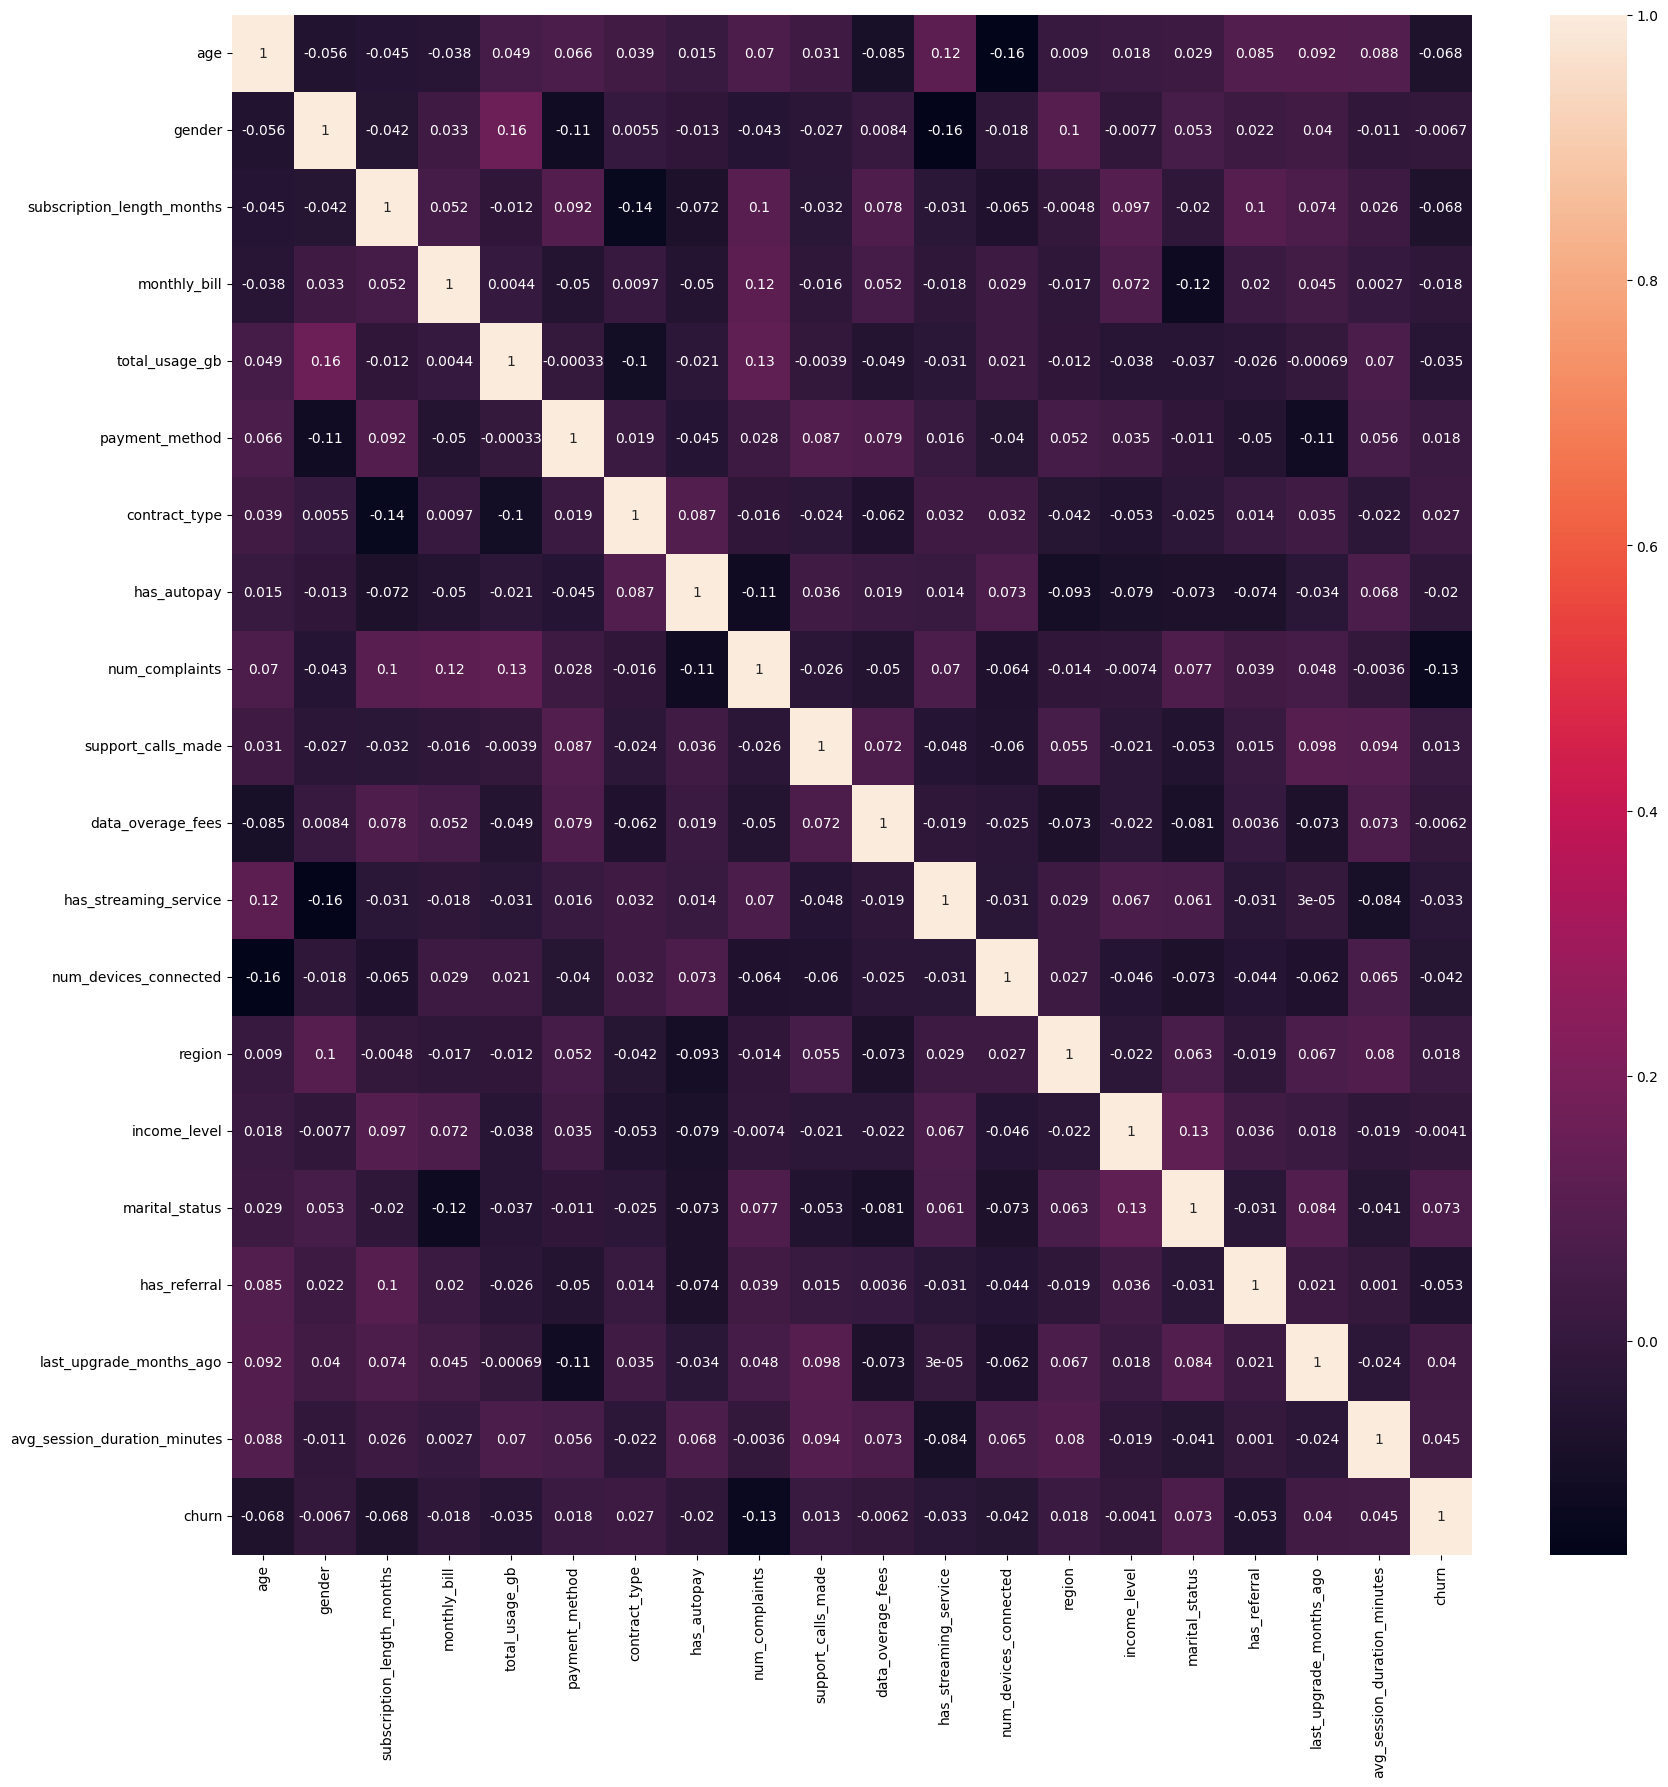

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

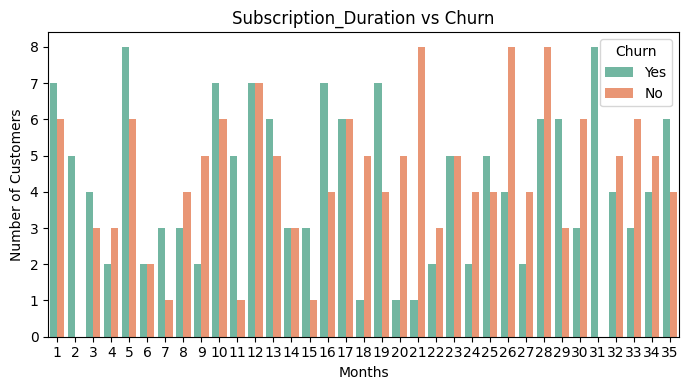

In [32]:
# Plot countplot to visualize Subscription_length vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='subscription_length_months', hue='churn', palette='Set2')
plt.title('Subscription_Duration vs Churn')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

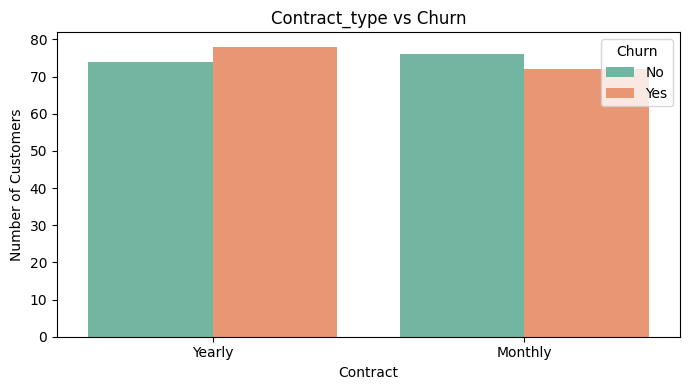

In [29]:
# Plot countplot to visualize Partner vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='contract_type', hue='churn', palette='Set2')
plt.title('Contract_type vs Churn')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

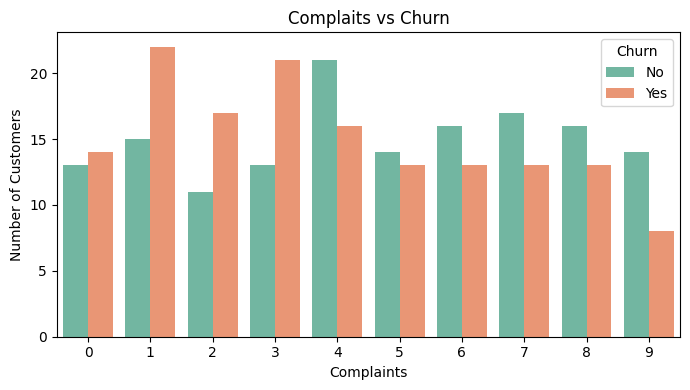

In [34]:
# Plot countplot to visualize Partner vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='num_complaints', hue='churn', palette='Set2')
plt.title('Complaits vs Churn')
plt.xlabel('Complaints')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

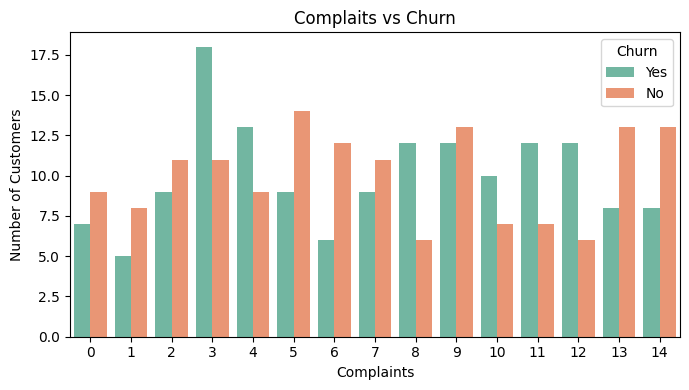

In [35]:

# Plot countplot to visualize Partner vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='support_calls_made', hue='churn', palette='Set2')
plt.title('Complaits vs Churn')
plt.xlabel('Complaints')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

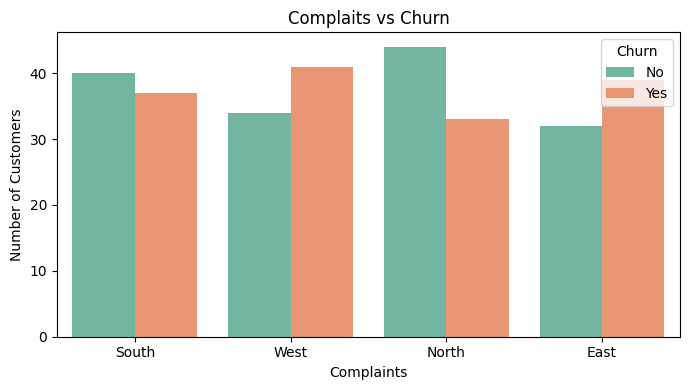

In [36]:
# Plot countplot to visualize Partner vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='region', hue='churn', palette='Set2')
plt.title('Complaits vs Churn')
plt.xlabel('Complaints')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

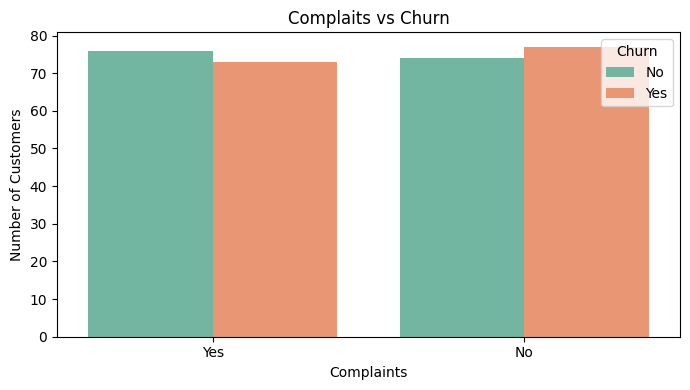

In [37]:
# Plot countplot to visualize Partner vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='has_autopay', hue='churn', palette='Set2')
plt.title('Complaits vs Churn')
plt.xlabel('Complaints')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

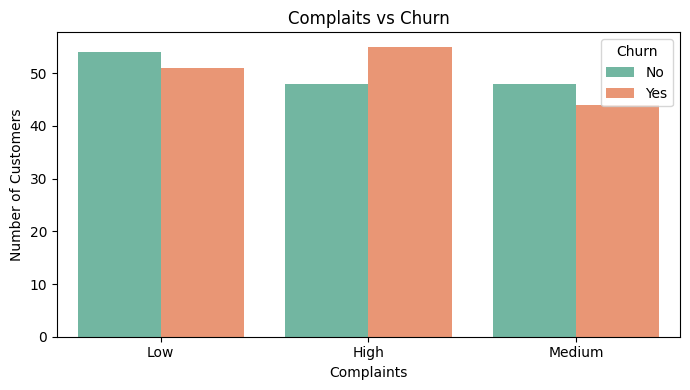

In [41]:
# Plot countplot to visualize Partner vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='income_level', hue='churn', palette='Set2')
plt.title('Complaits vs Churn')
plt.xlabel('Complaints')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

C:\Users\PUNEETH\AppData\Local\Temp\ipykernel_16316\2723913722.py:9: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


<Figure size 2500x3500 with 0 Axes>

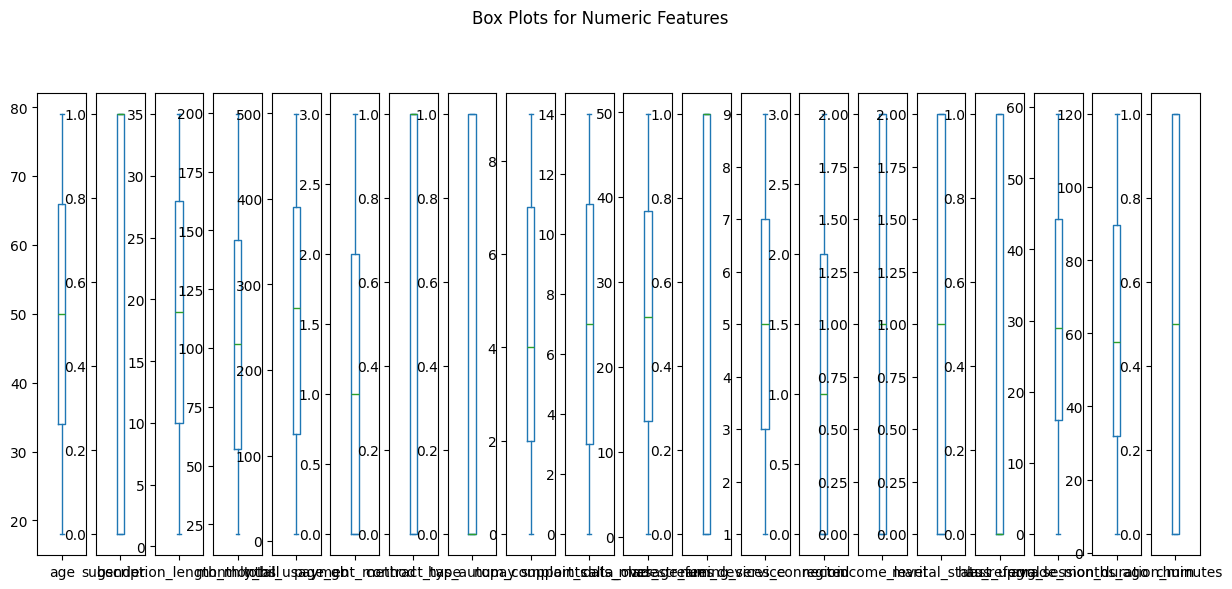

In [40]:

# Select only numeric columns
numeric_cols = df1.select_dtypes(include='number').columns

# Set the plot size
plt.figure(figsize=(25, 35))

# Draw boxplots for each numeric column
df1[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(15, 6), sharey=False)
plt.tight_layout()
plt.suptitle("Box Plots for Numeric Features", y=1.02)
plt.show()


C:\Users\PUNEETH\AppData\Local\Temp\ipykernel_16316\3456931106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='age', data=df, palette='Set2')


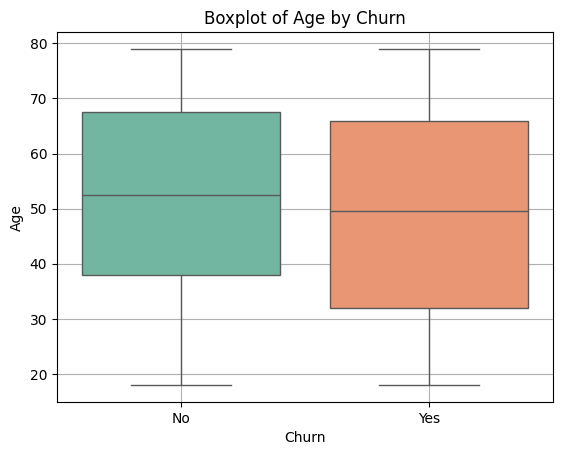

In [43]:
sns.boxplot(x='churn', y='age', data=df, palette='Set2')
plt.title('Boxplot of Age by Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.grid(True)
plt.show()

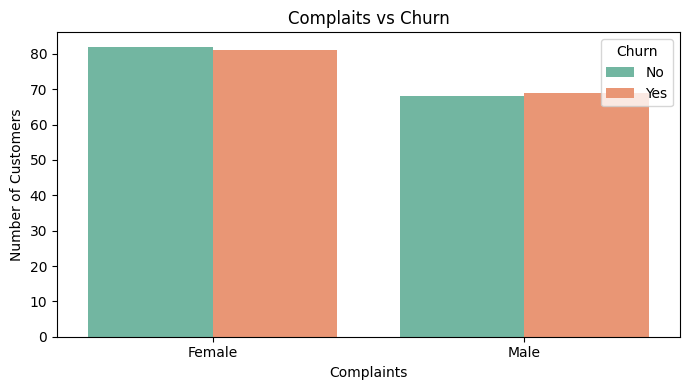

In [45]:
# Plot countplot to visualize Partner vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='gender', hue='churn', palette='Set2')
plt.title('Complaits vs Churn')
plt.xlabel('Complaints')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [30]:
df1.churn.value_counts()

churn
0    150
1    150
Name: count, dtype: int64

Therefore DataSet is balanced

Featueres which are not in use
1- Age
2- Gender,
Can't judge which to drop since the correlation between Churn and feature are equal to 0

In This dataset most of the feature is not Corellated since correlation value if very close towards 0

Model Selection

Test Train Split

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df1.drop(['churn','age','gender'], axis=1)
y = df1['churn']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Logistic Regression model


# Create the logistic regression model
# solver='liblinear' is good for small datasets and binary classification
model = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("✅ Model Trained Successfully!\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Trained Successfully!

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.57      0.52        28
           1       0.54      0.44      0.48        32

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.50        60
weighted avg       0.51      0.50      0.50        60

Confusion Matrix:
 [[16 12]
 [18 14]]


In [54]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 3: Standardize the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the dataset
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train the SVM model
model = SVC(kernel='linear')  # You can change kernel to 'linear', 'poly', or 'sigmoid'
model.fit(X_train_svm, y_train_svm)

# Step 6: Predict and evaluate
y_pred_svm = model.predict(X_test_svm)

print("✅ SVM Model Trained\n")
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))


✅ SVM Model Trained

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.54      0.50        28
           1       0.54      0.47      0.50        32

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.50        60
weighted avg       0.50      0.50      0.50        60

Confusion Matrix:
 [[15 13]
 [17 15]]


In [55]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
y_pred_rf = model_rf.predict(X_test)

print("✅ Random Forest Model Trained\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


✅ Random Forest Model Trained

Accuracy: 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52        28
           1       0.57      0.53      0.55        32

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.53        60
weighted avg       0.54      0.53      0.53        60

Confusion Matrix:
 [[15 13]
 [15 17]]
